In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [30]:
df = pd.read_csv('abalone.csv')

In [31]:
df['Age'] = df['Rings']+1.5

In [32]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
Age               4177 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


In [34]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [35]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [36]:
df.corr()['Age'].sort_values(ascending=False)

Age               1.000000
Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Age, dtype: float64

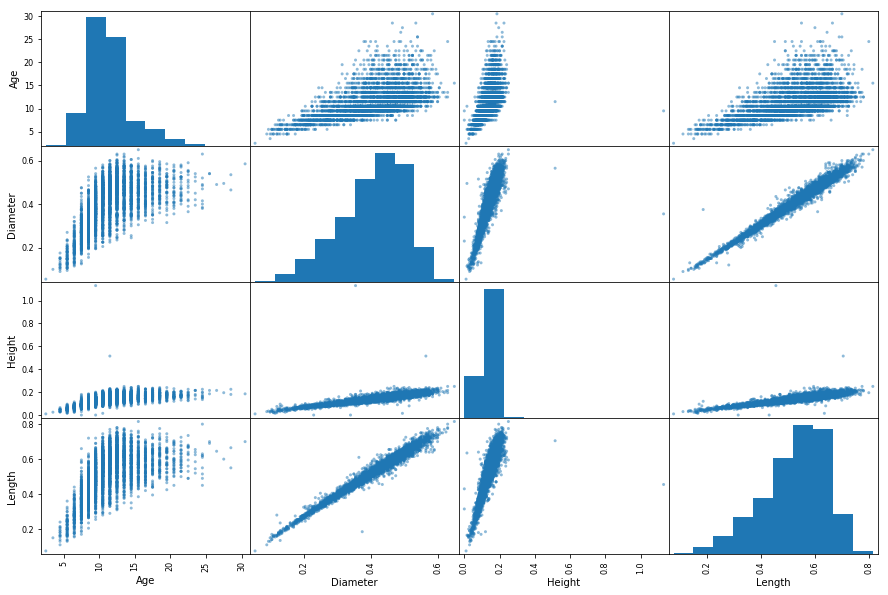

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Diameter", "Height", "Length"]
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

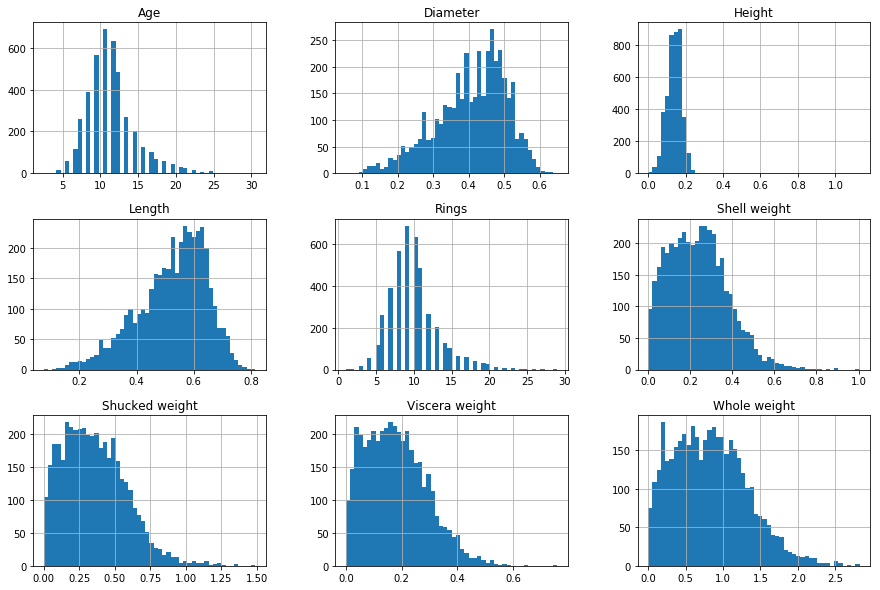

In [38]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [40]:
df['Height'].sort_values(ascending=False).head()

2051    1.130
1417    0.515
2179    0.250
1428    0.250
1763    0.250
Name: Height, dtype: float64

In [41]:
df.iloc[2051]

Sex                    F
Length             0.455
Diameter           0.355
Height              1.13
Whole weight       0.594
Shucked weight     0.332
Viscera weight     0.116
Shell weight      0.1335
Rings                  8
Age                  9.5
Name: 2051, dtype: object

In [42]:
df.drop(df.index[2051], inplace=True)

In [43]:
df['Height'].sort_values(ascending=True).head()

1257    0.000
3996    0.000
236     0.010
2169    0.015
1174    0.015
Name: Height, dtype: float64

In [44]:
df.drop(df.index[1257], inplace=True)

In [47]:
df['Height'].sort_values(ascending=True).head()

3996    0.000
236     0.010
2169    0.015
1174    0.015
694     0.020
Name: Height, dtype: float64

In [46]:
df.drop(df.index[3996], inplace=True)

In [48]:
#Transforming all Categorical Variables to Numeric variables
#LabelEncoder: Encodelabels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sex']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [49]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [50]:
X = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight']]
y = df['Age']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
# Fitting multiple lineaar regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.3750


In [54]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 2.5880


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4174 non-null int64
Length            4174 non-null float64
Diameter          4174 non-null float64
Height            4174 non-null float64
Whole weight      4174 non-null float64
Shucked weight    4174 non-null float64
Viscera weight    4174 non-null float64
Shell weight      4174 non-null float64
Rings             4174 non-null int64
Age               4174 non-null float64
dtypes: float64(8), int64(2)
memory usage: 518.7 KB


# Building the optimal model using backward elimination

In [56]:
import statsmodels.formula.api as sm 
X = np.append(arr = np.ones((4174, 1)).astype(int), values = X, axis = 1) 
X_opt = X[:, :] 
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     502.5
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:12:40   Log-Likelihood:                -9824.3
No. Observations:                4174   AIC:                         1.966e+04
Df Residuals:                    4168   BIC:                         1.970e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.314     12.741      0.000       3.383       4.614
x1            -0.0358      0.048     -0.744      0.457      -0.130       0.058
x2           -12.4160      2.069     -6.000      0.000     -16.473      -8.359
x3            21.4739      2.558      8.395      0.000      16.459      26.489
x4            40.3730      2.452     16.468      0.000      35.567      45.179
x5            -0.4866      0.227     -2.142      0.032      -0.932      -0.041
==============================================================================
Omnibus:                     1306.985   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4537.810
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       7.050   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_opt = X[:,  [2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:12:40   Log-Likelihood:                -9905.9
No. Observations:                4174   AIC:                         1.982e+04
Df Residuals:                    4170   BIC:                         1.985e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0777      1.944     -1.069      0.285      -5.888       1.733
x2            20.4433      2.606      7.845      0.000      15.335      25.552
x3            46.4308      2.453     18.929      0.000      41.622      51.240
x4            -2.8341      0.139    -20.463      0.000      -3.106      -2.563
==============================================================================
Omnibus:                     1179.877   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3828.494
Skew:                           1.422   Prob(JB):                         0.00
Kurtosis:                       6.731   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_opt = X[:,  [1, 2, 3, 4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:12:49   Log-Likelihood:                -10088.
No. Observations:                4174   AIC:                         2.018e+04
Df Residuals:                    4170   BIC:                         2.021e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2893      0.049      5.913      0.000       0.193       0.385
x2             5.5857      1.994      2.801      0.005       1.676       9.496
x3             7.9492      2.639      3.013      0.003       2.776      13.122
x4            34.2318      2.481     13.799      0.000      29.368      39.095
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.947
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.527   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_opt = X[:,   [2, 3, 4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.506e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:12:50   Log-Likelihood:                -10106.
No. Observations:                4174   AIC:                         2.022e+04
Df Residuals:                    4171   BIC:                         2.024e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.3034      1.981      3.686      0.000       3.419      11.188
x2             6.6121      2.640      2.505      0.012       1.437      11.787
x3            33.7612      2.490     13.561      0.000      28.880      38.642
==============================================================================
Omnibus:                      785.115   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1757.299
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.342   Cond. No.                         54.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""